In [1]:
# Imoporting librairies
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
# Load the datasets
df_train = pd.read_csv('archive/titanic/train.csv')
df_test  = pd.read_csv('archive/titanic/test.csv')

In [3]:
# Shape of datasets
print("train datasets shape: ", df_train.shape)
print("\ntest datasets shape: ", df_test.shape)

train datasets shape:  (792, 17)

test datasets shape:  (100, 17)


In [4]:
df_train.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'],
      dtype='object')

In [5]:
# visualize the header of train dataset
df_train.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [6]:
# Set index on the train dataset
df_train.set_index('Unnamed: 0', drop=True, inplace=True)
df_train.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
Unnamed: 0,,,,,,,,,,,,,,,,
0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [7]:
df_train.index.name = 'index'

In [8]:
df_train.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
index,,,,,,,,,,,,,,,,
0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [9]:
# Count the Survived values
df_train.Survived.value_counts()

0    486
1    306
Name: Survived, dtype: int64

In [10]:
# Count the Sex values
df_train.Sex.value_counts()

1    513
0    279
Name: Sex, dtype: int64

In [11]:
# Check the null values
df_train.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [12]:
# Drop unnecessary columns
df_train.drop(columns=['PassengerId'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'PassengerId'], inplace=True)

df_train.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
index,,,,,,,,,,,,,,,
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [13]:
df_test.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


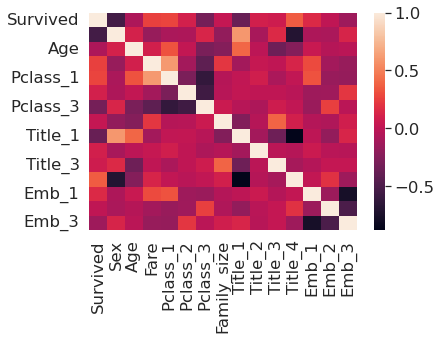

In [14]:
# Visualize the dataset correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df_train.corr())
plt.show()

In [15]:
df_test.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [16]:
# Spliting the datasets df_train and df_test to train model
X_train = df_train.drop('Survived', axis=1)
X_train = X_train.values
y_train = df_train['Survived']

X_test  = df_test.drop('Survived', axis=1)
X_test  = X_test.values
y_test  = df_test['Survived']

In [21]:
# Print the shape on datasets
print("X_train.shape: ", X_train.shape)
print('y_train.shape: ', y_train.shape)
print("\nX_test.shape: ", X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (792, 14)
y_train.shape:  (792,)

X_test.shape:  (100, 14)
y_test.shape:  (100,)


In [22]:
# Building the model
logReg = LogisticRegression()

In [23]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Predicting the values using X_test
pred = logReg.predict(X_test)

In [25]:
# check the confusion matrix
metrics.confusion_matrix(y_test, pred)

array([[57,  7],
       [ 5, 31]])

In [26]:
# Checking the accuracy
metrics.accuracy_score(y_test, pred)

0.88

In [27]:
# Make report about test label and prediction
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100



In [28]:
# Check the coeficients values of the model
logReg.coef_

array([[-2.91009558, -1.08623478,  0.46247683,  0.9332186 ,  0.10639119,
        -1.03832063, -2.06333792, -0.87767216,  0.13053625,  1.64417078,
        -0.89574571,  0.20037446, -0.02006746, -0.25060282]])

In [29]:
# Predict the probability for any value in with it belongs
logReg.predict_proba(X_test)

array([[0.74794699, 0.25205301],
       [0.82161727, 0.17838273],
       [0.49214673, 0.50785327],
       [0.91458499, 0.08541501],
       [0.80403713, 0.19596287],
       [0.03881713, 0.96118287],
       [0.38736775, 0.61263225],
       [0.87958039, 0.12041961],
       [0.48169259, 0.51830741],
       [0.79311917, 0.20688083],
       [0.2303578 , 0.7696422 ],
       [0.1424951 , 0.8575049 ],
       [0.32522895, 0.67477105],
       [0.9167461 , 0.0832539 ],
       [0.92074591, 0.07925409],
       [0.64488443, 0.35511557],
       [0.35068945, 0.64931055],
       [0.80403713, 0.19596287],
       [0.0965173 , 0.9034827 ],
       [0.91564031, 0.08435969],
       [0.92732907, 0.07267093],
       [0.79570528, 0.20429472],
       [0.60774522, 0.39225478],
       [0.92023087, 0.07976913],
       [0.60999009, 0.39000991],
       [0.36626918, 0.63373082],
       [0.77610638, 0.22389362],
       [0.9319259 , 0.0680741 ],
       [0.65904646, 0.34095354],
       [0.14079665, 0.85920335],
       [0.

In [31]:
logReg.predict_proba(X_test[:1])

array([[0.74794699, 0.25205301]])